## Historical Used Car Sales - Clustering and Predictions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
from scipy import stats

vehicles_df = pd.read_csv('vehicles.csv')
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [2]:
vehicles_df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [3]:
vehicles_df.nunique()

id              426880
url             426880
region             404
region_url         413
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118264
drive                3
size                 4
type                13
paint_color         12
image_url       241899
description     360911
county               0
state               51
lat              53181
long             53772
posting_date    381536
dtype: int64

It appears there are both categorical and continuous columns in the dataframe. There is also a mix of objects, integers, and floats.

In [4]:
missing = vehicles_df.isna().sum() * 100 / len(vehicles_df)
print(missing)

id                0.000000
url               0.000000
region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
VIN              37.725356
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
image_url         0.015930
description       0.016398
county          100.000000
state             0.000000
lat               1.534155
long              1.534155
posting_date      0.015930
dtype: float64


In [5]:
vehicles_df = vehicles_df.drop(['county', 'size', 'VIN', 'url', 'region_url',
                               'image_url', 'id', 'description'], axis=1)
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  type          334022 non-null  object 
 13  paint_color   296677 non-null  object 
 14  state         426880 non-null  object 
 15  lat           420331 non-null  float64
 16  long          420331 non-null  float64
 17  posting_date  426812 non-null  object 
dtypes: f

I've decided to drop a few columns from the dataframe for the following reasons:
1. county - 100% missing values
2. size - vague unique values, 'type' variable is more descriptive and accurate
3. VIN - car identificatin number - not needed, remove for anonymity purposes
4. url - url credentials not needed for model, need to be assessed separately
5. region_url - url credentials not needed for model, need to be assessed separately
6. image_url - url credentials not needed for model, need to be assessed separately
7. id - identification number --> index number
8. description - language model not necessary

In [6]:
missing = vehicles_df.isna().sum() * 100 / len(vehicles_df)
print(missing)

region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
type            21.752717
paint_color     30.501078
state            0.000000
lat              1.534155
long             1.534155
posting_date     0.015930
dtype: float64


In [7]:
for column, missing in missing.items():
    if missing < 10:
        vehicles_df = vehicles_df[vehicles_df[column].notna()]
        
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383489 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        383489 non-null  object 
 1   price         383489 non-null  int64  
 2   year          383489 non-null  float64
 3   manufacturer  383489 non-null  object 
 4   model         383489 non-null  object 
 5   condition     231391 non-null  object 
 6   cylinders     223023 non-null  object 
 7   fuel          383489 non-null  object 
 8   odometer      383489 non-null  float64
 9   title_status  383489 non-null  object 
 10  transmission  383489 non-null  object 
 11  drive         269328 non-null  object 
 12  type          301094 non-null  object 
 13  paint_color   271277 non-null  object 
 14  state         383489 non-null  object 
 15  lat           383489 non-null  float64
 16  long          383489 non-null  float64
 17  posting_date  383489 non-null  object 
dtypes: 

In [8]:
still_missing = vehicles_df[['condition', 'cylinders', 'drive', 'type', 'paint_color']]
still_missing.nunique()

condition       6
cylinders       8
drive           3
type           13
paint_color    12
dtype: int64

In [9]:
still_missing.isnull().sum()

condition      152098
cylinders      160466
drive          114161
type            82395
paint_color    112212
dtype: int64

In [10]:
for column in still_missing.columns:
    vehicles_df[column].fillna('Unknown', inplace=True)
    
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383489 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        383489 non-null  object 
 1   price         383489 non-null  int64  
 2   year          383489 non-null  float64
 3   manufacturer  383489 non-null  object 
 4   model         383489 non-null  object 
 5   condition     383489 non-null  object 
 6   cylinders     383489 non-null  object 
 7   fuel          383489 non-null  object 
 8   odometer      383489 non-null  float64
 9   title_status  383489 non-null  object 
 10  transmission  383489 non-null  object 
 11  drive         383489 non-null  object 
 12  type          383489 non-null  object 
 13  paint_color   383489 non-null  object 
 14  state         383489 non-null  object 
 15  lat           383489 non-null  float64
 16  long          383489 non-null  float64
 17  posting_date  383489 non-null  object 
dtypes: 

To conclude missing value analysis, columns with less than 10% of missing values were isolated and null rows were removed. The remaining columns with greater than 10% missing values appeared to be categorical and very relevant to the model. Thus, a new category was created in each of the remaining columns to convert the null values to 'Unknown'. This resulted in a reduction of total sample count to 383,487.

Missing value analysis is now complete. Variables need to be explored now with respect to data type and correlation analysis.

In [11]:
vehicle_obj = vehicles_df.select_dtypes(include=['object'])
vehicle_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383489 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        383489 non-null  object
 1   manufacturer  383489 non-null  object
 2   model         383489 non-null  object
 3   condition     383489 non-null  object
 4   cylinders     383489 non-null  object
 5   fuel          383489 non-null  object
 6   title_status  383489 non-null  object
 7   transmission  383489 non-null  object
 8   drive         383489 non-null  object
 9   type          383489 non-null  object
 10  paint_color   383489 non-null  object
 11  state         383489 non-null  object
 12  posting_date  383489 non-null  object
dtypes: object(13)
memory usage: 41.0+ MB


In [12]:
vehicle_obj.nunique()

region             404
manufacturer        41
model            21785
condition            7
cylinders            9
fuel                 5
title_status         6
transmission         3
drive                4
type                14
paint_color         13
state               51
posting_date    343712
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each categorical column and apply label encoding
for column in vehicle_obj.columns:
    vehicle_obj[column] = label_encoder.fit_transform(vehicle_obj[column].astype(str))

vehicle_obj = vehicle_obj.astype('int64')
vehicle_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383489 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   region        383489 non-null  int64
 1   manufacturer  383489 non-null  int64
 2   model         383489 non-null  int64
 3   condition     383489 non-null  int64
 4   cylinders     383489 non-null  int64
 5   fuel          383489 non-null  int64
 6   title_status  383489 non-null  int64
 7   transmission  383489 non-null  int64
 8   drive         383489 non-null  int64
 9   type          383489 non-null  int64
 10  paint_color   383489 non-null  int64
 11  state         383489 non-null  int64
 12  posting_date  383489 non-null  int64
dtypes: int64(13)
memory usage: 41.0 MB


In [14]:
vehicle_obj.nunique()

region             404
manufacturer        41
model            21785
condition            7
cylinders            9
fuel                 5
title_status         6
transmission         3
drive                4
type                14
paint_color         13
state               51
posting_date    343712
dtype: int64

After isolating the 'object' columns, a label encoder was used to convert each unique value in each column to a distinct numerical number. This creates data type 'int32', which was consequently converted to 'int64' to finish. This conversion did not affect the unique counts or locations of values.

Now that all variables in the dataframe are numeric, we can begin analyzing outliers and perform exploratory analysis.

In [15]:
# Assign the values from vehicle_obj[column] to vehicles_df[column]
for column in vehicle_obj.columns:
    vehicles_df[column] = vehicle_obj[column]
    
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383489 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        383489 non-null  int64  
 1   price         383489 non-null  int64  
 2   year          383489 non-null  float64
 3   manufacturer  383489 non-null  int64  
 4   model         383489 non-null  int64  
 5   condition     383489 non-null  int64  
 6   cylinders     383489 non-null  int64  
 7   fuel          383489 non-null  int64  
 8   odometer      383489 non-null  float64
 9   title_status  383489 non-null  int64  
 10  transmission  383489 non-null  int64  
 11  drive         383489 non-null  int64  
 12  type          383489 non-null  int64  
 13  paint_color   383489 non-null  int64  
 14  state         383489 non-null  int64  
 15  lat           383489 non-null  float64
 16  long          383489 non-null  float64
 17  posting_date  383489 non-null  int64  
dtypes: 

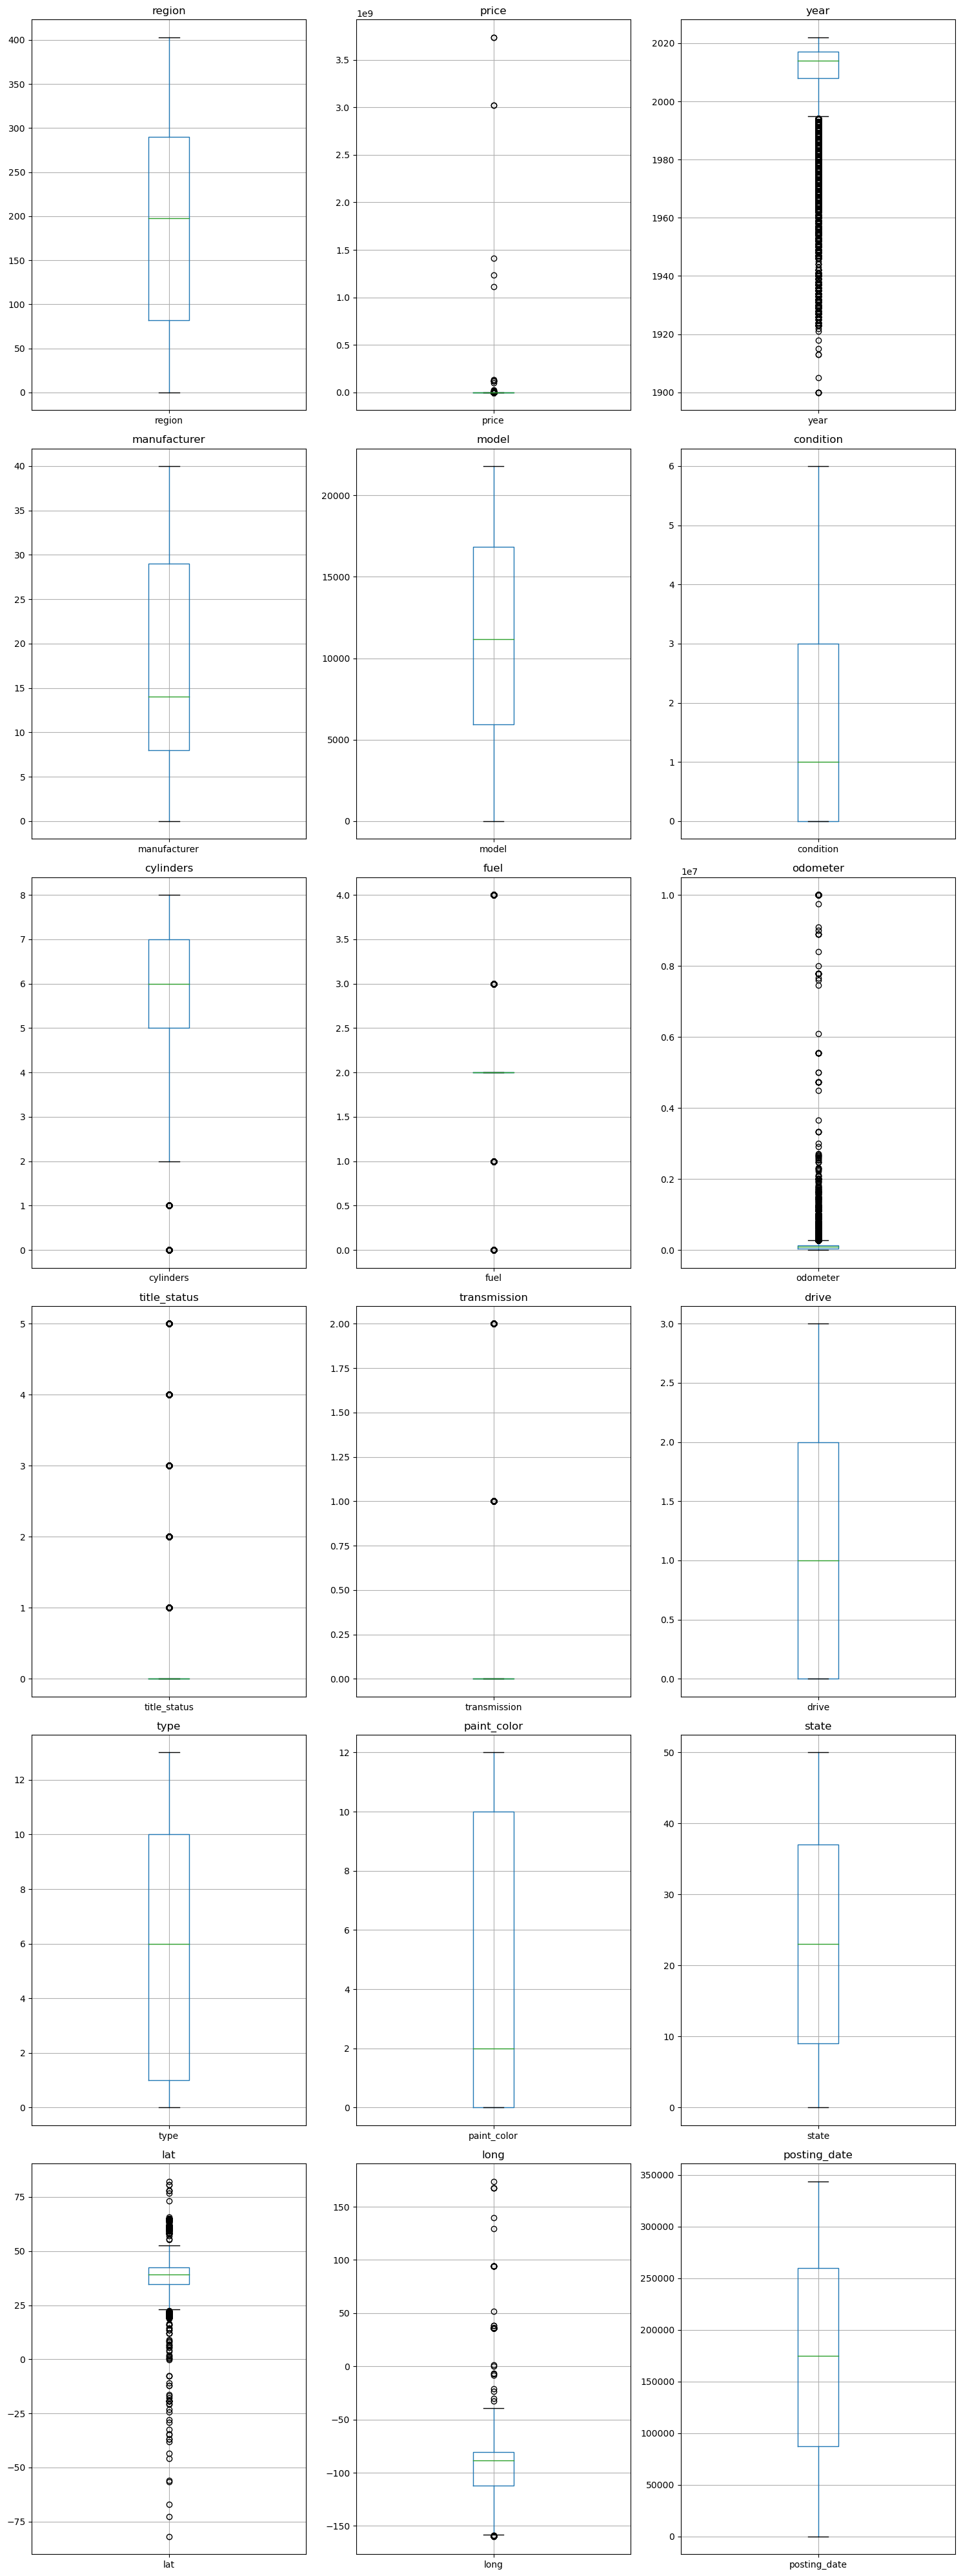

In [16]:
# Create boxplots for variables
# Calculate the number of rows and columns for subplots
num_columns = 3
num_rows = (len(vehicles_df.columns) - 1) // num_columns + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 40))

# Iterate through columns and plot boxplots
for i, column in enumerate(vehicles_df.columns):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row][col]
    vehicles_df.boxplot(column=column, ax=ax)
    ax.set_title(column)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [17]:
# assess IQR percentiles and count of outliers for columns

for column in vehicles_df.columns:
    q75, q25 = np.percentile(vehicles_df[column], [75, 25])
    iqr = q75 - q25
    threshold = 1.5
    min_val = q25 - (iqr * threshold)
    max_val = q75 + (iqr * threshold)
    
    print("Column: {}".format(column))
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}\n".format(
        len((np.where((vehicles_df[column] > max_val) | (vehicles_df[column] < min_val))[0]))
    ))

Column: region
The score threshold is: 1.5
Number of outliers is: 0

Column: price
The score threshold is: 1.5
Number of outliers is: 6285

Column: year
The score threshold is: 1.5
Number of outliers is: 12023

Column: manufacturer
The score threshold is: 1.5
Number of outliers is: 0

Column: model
The score threshold is: 1.5
Number of outliers is: 0

Column: condition
The score threshold is: 1.5
Number of outliers is: 0

Column: cylinders
The score threshold is: 1.5
Number of outliers is: 1399

Column: fuel
The score threshold is: 1.5
Number of outliers is: 58686

Column: odometer
The score threshold is: 1.5
Number of outliers is: 3118

Column: title_status
The score threshold is: 1.5
Number of outliers is: 12443

Column: transmission
The score threshold is: 1.5
Number of outliers is: 79696

Column: drive
The score threshold is: 1.5
Number of outliers is: 0

Column: type
The score threshold is: 1.5
Number of outliers is: 0

Column: paint_color
The score threshold is: 1.5
Number of out

Based on percentile analysis and boxplots, outliers are only present in some of the columns. These columns need to be isolated and analyzed/transformed.

In [18]:
outliers_df = vehicles_df[['price', 'year', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'lat', 'long']]
outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383489 entries, 27 to 426879
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         383489 non-null  int64  
 1   year          383489 non-null  float64
 2   cylinders     383489 non-null  int64  
 3   fuel          383489 non-null  int64  
 4   odometer      383489 non-null  float64
 5   title_status  383489 non-null  int64  
 6   transmission  383489 non-null  int64  
 7   lat           383489 non-null  float64
 8   long          383489 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 29.3 MB


In [19]:
for column in outliers_df.columns:
    q75, q25 = np.percentile(outliers_df[column], [75, 25])
    iqr = q75 - q25
    threshold = 1.5
    min_val = q25 - (iqr * threshold)
    max_val = q75 + (iqr * threshold)
    
    print("Column: {}".format(column))
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}\n".format(
        len((np.where((outliers_df[column] > max_val) | (outliers_df[column] < min_val))[0]))
    ))

Column: price
The score threshold is: 1.5
Number of outliers is: 6285

Column: year
The score threshold is: 1.5
Number of outliers is: 12023

Column: cylinders
The score threshold is: 1.5
Number of outliers is: 1399

Column: fuel
The score threshold is: 1.5
Number of outliers is: 58686

Column: odometer
The score threshold is: 1.5
Number of outliers is: 3118

Column: title_status
The score threshold is: 1.5
Number of outliers is: 12443

Column: transmission
The score threshold is: 1.5
Number of outliers is: 79696

Column: lat
The score threshold is: 1.5
Number of outliers is: 5815

Column: long
The score threshold is: 1.5
Number of outliers is: 192



In [20]:
outliers_df.nunique()

price           14638
year              107
cylinders           9
fuel                5
odometer        99329
title_status        6
transmission        3
lat             49550
long            50091
dtype: int64

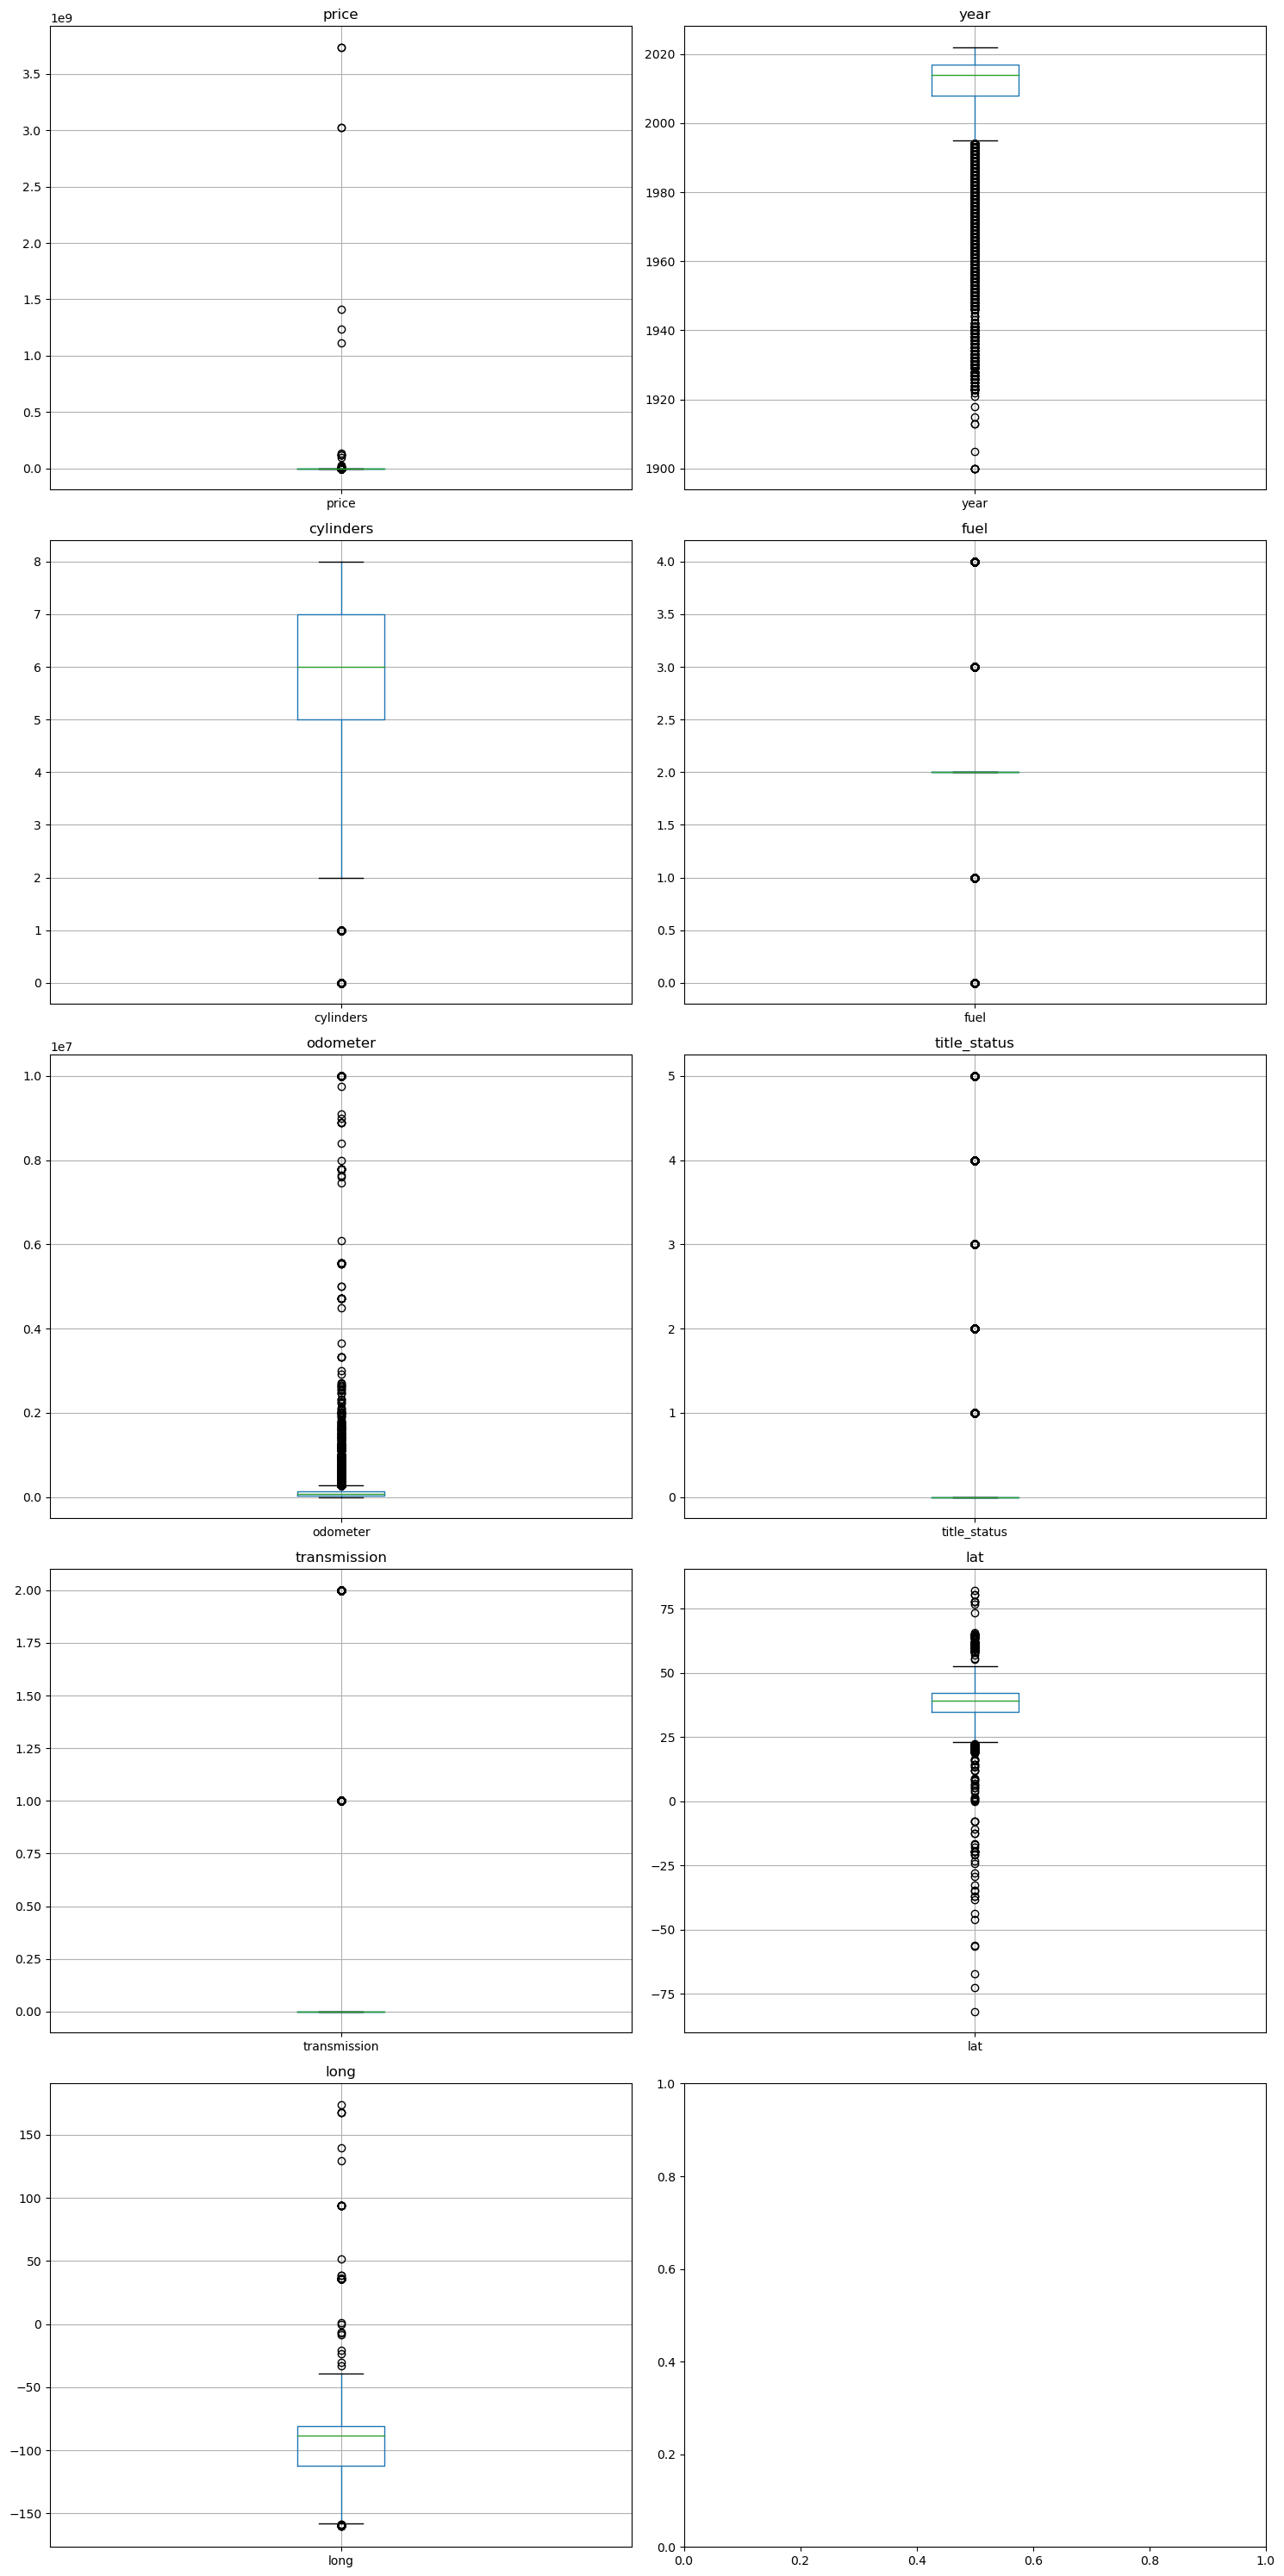

In [21]:
num_columns = 2
num_rows = (len(outliers_df.columns) - 1) // num_columns + 1

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 30))

for i, column in enumerate(outliers_df.columns):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row][col]
    outliers_df.boxplot(column=column, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [22]:
# Apply sqrt transformation to each column
sqrt_transform = outliers_df.apply(np.sqrt)
for column in sqrt_transform.columns:
    q75, q25 = np.percentile(sqrt_transform[column], [75, 25])
    iqr = q75 - q25
    threshold = 1.5
    min_val = q25 - (iqr * threshold)
    max_val = q75 + (iqr * threshold)
    
    print("Column: {}".format(column))
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}\n".format(
        len((np.where((sqrt_transform[column] > max_val) | (sqrt_transform[column] < min_val))[0]))
    ))

Column: price
The score threshold is: 1.5
Number of outliers is: 732

Column: year
The score threshold is: 1.5
Number of outliers is: 12023

Column: cylinders
The score threshold is: 1.5
Number of outliers is: 1904

Column: fuel
The score threshold is: 1.5
Number of outliers is: 58686

Column: odometer
The score threshold is: 1.5
Number of outliers is: 988

Column: title_status
The score threshold is: 1.5
Number of outliers is: 12443

Column: transmission
The score threshold is: 1.5
Number of outliers is: 79696

Column: lat
The score threshold is: 1.5
Number of outliers is: 0

Column: long
The score threshold is: 1.5
Number of outliers is: 0



In [23]:
# Apply log transformation to each column
log_transform = outliers_df.apply(np.sqrt)
for column in log_transform.columns:
    q75, q25 = np.percentile(log_transform[column], [75, 25])
    iqr = q75 - q25
    threshold = 1.5
    min_val = q25 - (iqr * threshold)
    max_val = q75 + (iqr * threshold)
    
    print("Column: {}".format(column))
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}\n".format(
        len((np.where((sqrt_transform[column] > max_val) | (sqrt_transform[column] < min_val))[0]))
    ))

Column: price
The score threshold is: 1.5
Number of outliers is: 732

Column: year
The score threshold is: 1.5
Number of outliers is: 12023

Column: cylinders
The score threshold is: 1.5
Number of outliers is: 1904

Column: fuel
The score threshold is: 1.5
Number of outliers is: 58686

Column: odometer
The score threshold is: 1.5
Number of outliers is: 988

Column: title_status
The score threshold is: 1.5
Number of outliers is: 12443

Column: transmission
The score threshold is: 1.5
Number of outliers is: 79696

Column: lat
The score threshold is: 1.5
Number of outliers is: 0

Column: long
The score threshold is: 1.5
Number of outliers is: 0



In [24]:
from scipy.stats import mstats

# Apply winsorization to each column
winsorized_transform = outliers_df.apply(lambda x: mstats.winsorize(x, limits=[0.05, 0.05]))

for column in winsorized_transform.columns:
    q75, q25 = np.percentile(winsorized_transform[column], [75, 25])
    iqr = q75 - q25
    threshold = 1.5
    min_val = q25 - (iqr * threshold)
    max_val = q75 + (iqr * threshold)
    
    print("Column: {}".format(column))
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}\n".format(
        len((np.where((winsorized_transform[column] > max_val) | (winsorized_transform[column] < min_val))[0]))
    ))


Column: price
The score threshold is: 1.5
Number of outliers is: 0

Column: year
The score threshold is: 1.5
Number of outliers is: 0

Column: cylinders
The score threshold is: 1.5
Number of outliers is: 0

Column: fuel
The score threshold is: 1.5
Number of outliers is: 58686

Column: odometer
The score threshold is: 1.5
Number of outliers is: 0

Column: title_status
The score threshold is: 1.5
Number of outliers is: 0

Column: transmission
The score threshold is: 1.5
Number of outliers is: 79696

Column: lat
The score threshold is: 1.5
Number of outliers is: 0

Column: long
The score threshold is: 1.5
Number of outliers is: 0



3 types of transformations were attempted on the outlier columns. Winsorization proved to neutralize the most outliers based on IQR percentile analysis.

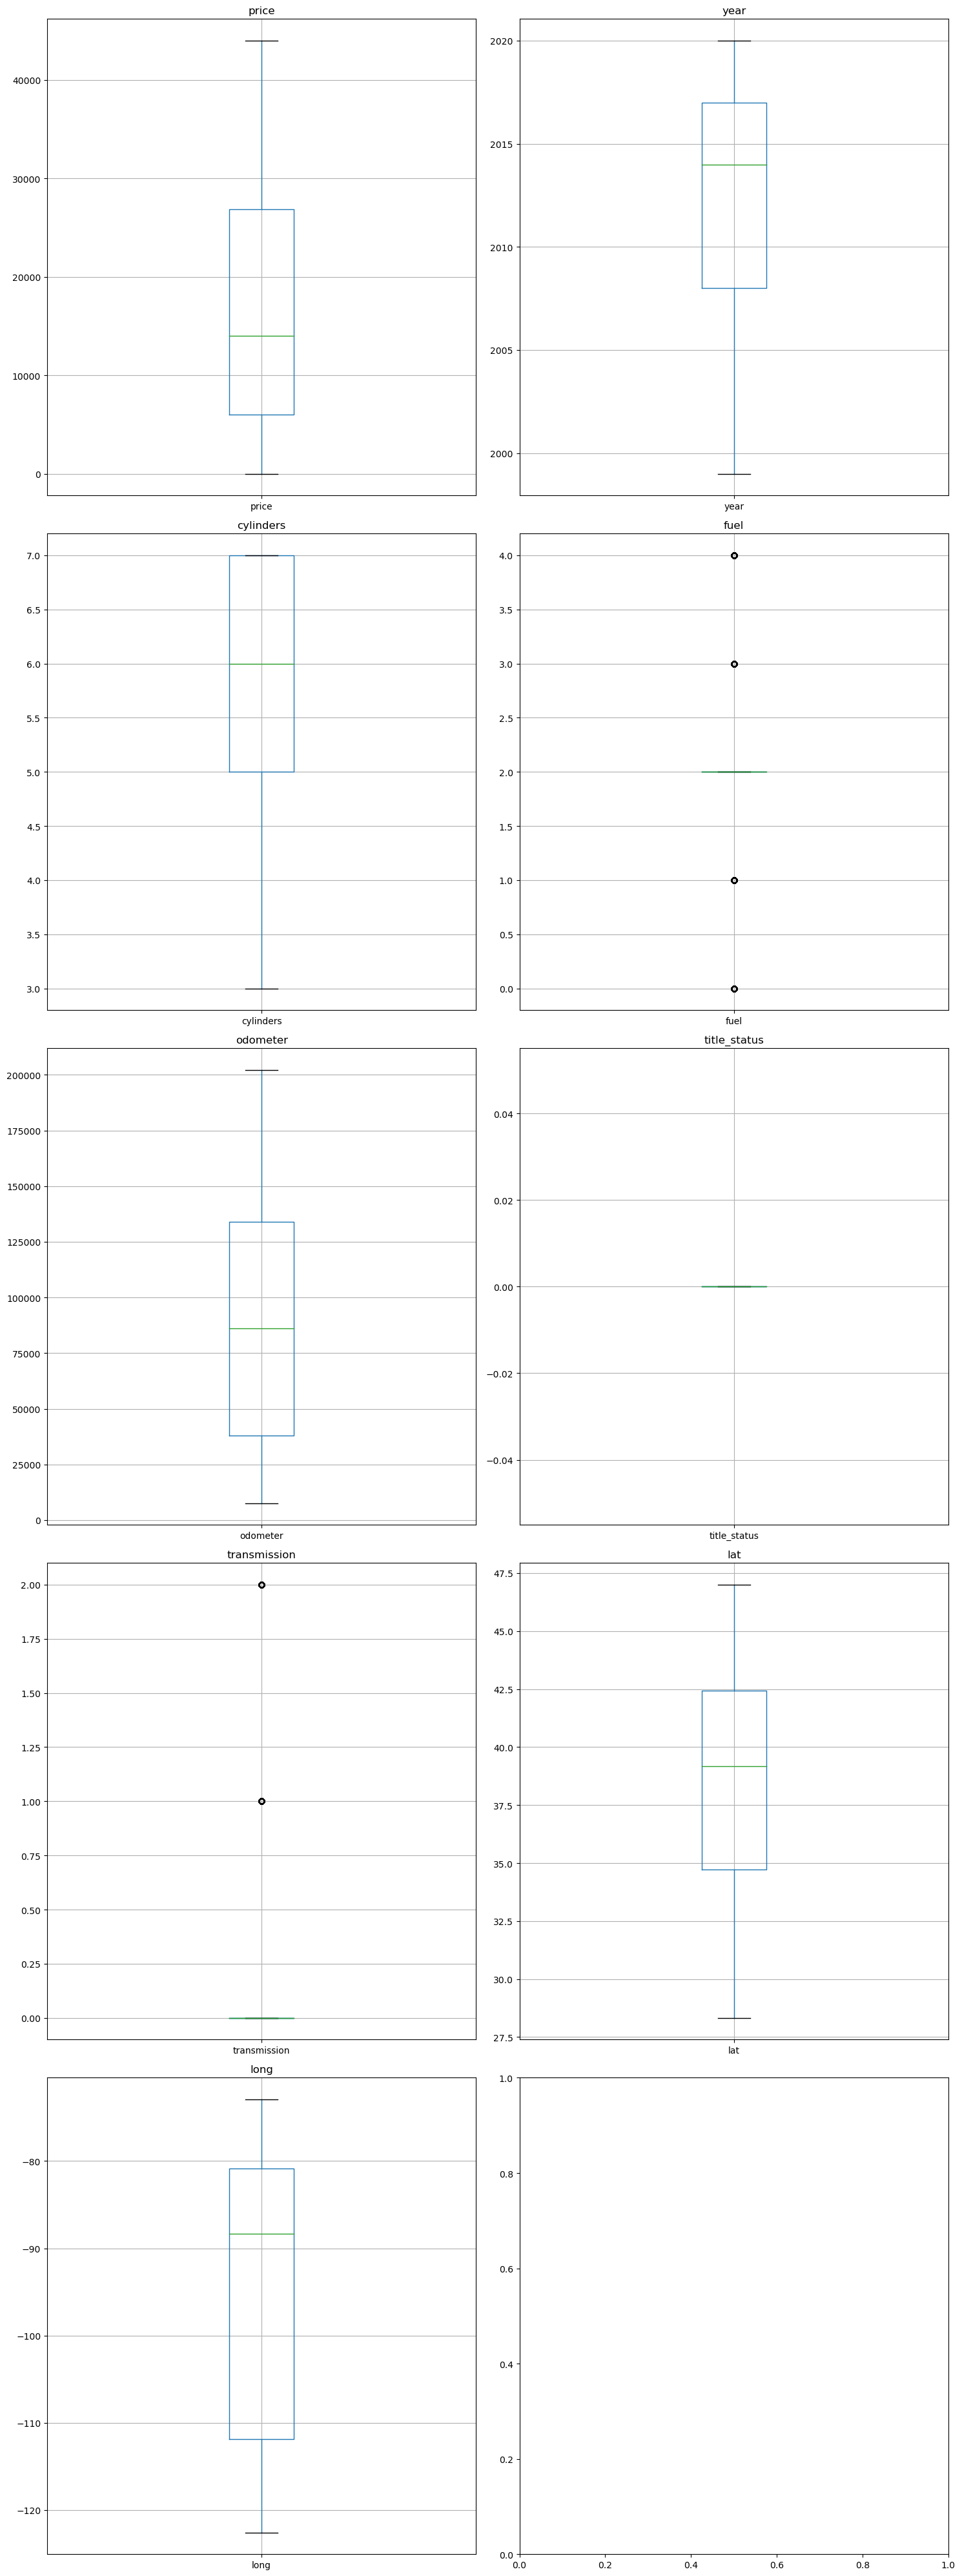

In [25]:
num_columns = 2
num_rows = (len(winsorized_transform.columns) - 1) // num_columns + 1

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 40))

for i, column in enumerate(winsorized_transform.columns):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row][col]
    winsorized_transform.boxplot(column=column, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [26]:
winsorized_transform.nunique()

price           12456
year               22
cylinders           5
fuel                5
odometer        89876
title_status        1
transmission        3
lat             45250
long            45389
dtype: int64

In [27]:
winsorized_transform = winsorized_transform.drop(['fuel', 'transmission', 'title_status'], axis=1)
winsorized_transform.nunique()

price        12456
year            22
cylinders        5
odometer     89876
lat          45250
long         45389
dtype: int64

The above boxplots show that outliers still exist in 3 columns after transformation - title_status, fuel, and transmission. In fact, none of the outliers in these columns were transformed. This is interesting and could potentially mean that these values are highly relevant to the dataset.

In [28]:
outliers_df.nunique()

price           14638
year              107
cylinders           9
fuel                5
odometer        99329
title_status        6
transmission        3
lat             49550
long            50091
dtype: int64

Unique values were printed above for the 3 abnormal columns. All 3 columns prove to be categorical, and thus outliers are probably very important to such. Thus, these 3 columns were dropped to maintain their integrity for the time being. Also keep in mind that these values are currently Label Encoded.

In [29]:
# Update outliers_df with winsorized values
outliers_df[winsorized_transform.columns] = winsorized_transform
outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383489 entries, 27 to 426879
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         383489 non-null  int64  
 1   year          383489 non-null  float64
 2   cylinders     383489 non-null  int64  
 3   fuel          383489 non-null  int64  
 4   odometer      383489 non-null  float64
 5   title_status  383489 non-null  int64  
 6   transmission  383489 non-null  int64  
 7   lat           383489 non-null  float64
 8   long          383489 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 29.3 MB


C:\Users\Jody\AppData\Local\Temp\ipykernel_24348\514228441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df[winsorized_transform.columns] = winsorized_transform


In [30]:
outliers_df.nunique()

price           12456
year               22
cylinders           5
fuel                5
odometer        89876
title_status        6
transmission        3
lat             45250
long            45389
dtype: int64

In [31]:
vehicles_df[outliers_df.columns] = outliers_df
vehicles_df.info()
vehicles_df.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383489 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        383489 non-null  int64  
 1   price         383489 non-null  int64  
 2   year          383489 non-null  float64
 3   manufacturer  383489 non-null  int64  
 4   model         383489 non-null  int64  
 5   condition     383489 non-null  int64  
 6   cylinders     383489 non-null  int64  
 7   fuel          383489 non-null  int64  
 8   odometer      383489 non-null  float64
 9   title_status  383489 non-null  int64  
 10  transmission  383489 non-null  int64  
 11  drive         383489 non-null  int64  
 12  type          383489 non-null  int64  
 13  paint_color   383489 non-null  int64  
 14  state         383489 non-null  int64  
 15  lat           383489 non-null  float64
 16  long          383489 non-null  float64
 17  posting_date  383489 non-null  int64  
dtypes: 

region             404
price            12456
year                22
manufacturer        41
model            21785
condition            7
cylinders            5
fuel                 5
odometer         89876
title_status         6
transmission         3
drive                4
type                14
paint_color         13
state               51
lat              45250
long             45389
posting_date    343712
dtype: int64

In [32]:
for column in vehicles_df.columns:
    q75, q25 = np.percentile(vehicles_df[column], [75, 25])
    iqr = q75 - q25
    threshold = 1.5
    min_val = q25 - (iqr * threshold)
    max_val = q75 + (iqr * threshold)
    
    print("Column: {}".format(column))
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}\n".format(
        len((np.where((vehicles_df[column] > max_val) | (vehicles_df[column] < min_val))[0]))
    ))

Column: region
The score threshold is: 1.5
Number of outliers is: 0

Column: price
The score threshold is: 1.5
Number of outliers is: 0

Column: year
The score threshold is: 1.5
Number of outliers is: 0

Column: manufacturer
The score threshold is: 1.5
Number of outliers is: 0

Column: model
The score threshold is: 1.5
Number of outliers is: 0

Column: condition
The score threshold is: 1.5
Number of outliers is: 0

Column: cylinders
The score threshold is: 1.5
Number of outliers is: 0

Column: fuel
The score threshold is: 1.5
Number of outliers is: 58686

Column: odometer
The score threshold is: 1.5
Number of outliers is: 0

Column: title_status
The score threshold is: 1.5
Number of outliers is: 12443

Column: transmission
The score threshold is: 1.5
Number of outliers is: 79696

Column: drive
The score threshold is: 1.5
Number of outliers is: 0

Column: type
The score threshold is: 1.5
Number of outliers is: 0

Column: paint_color
The score threshold is: 1.5
Number of outliers is: 0



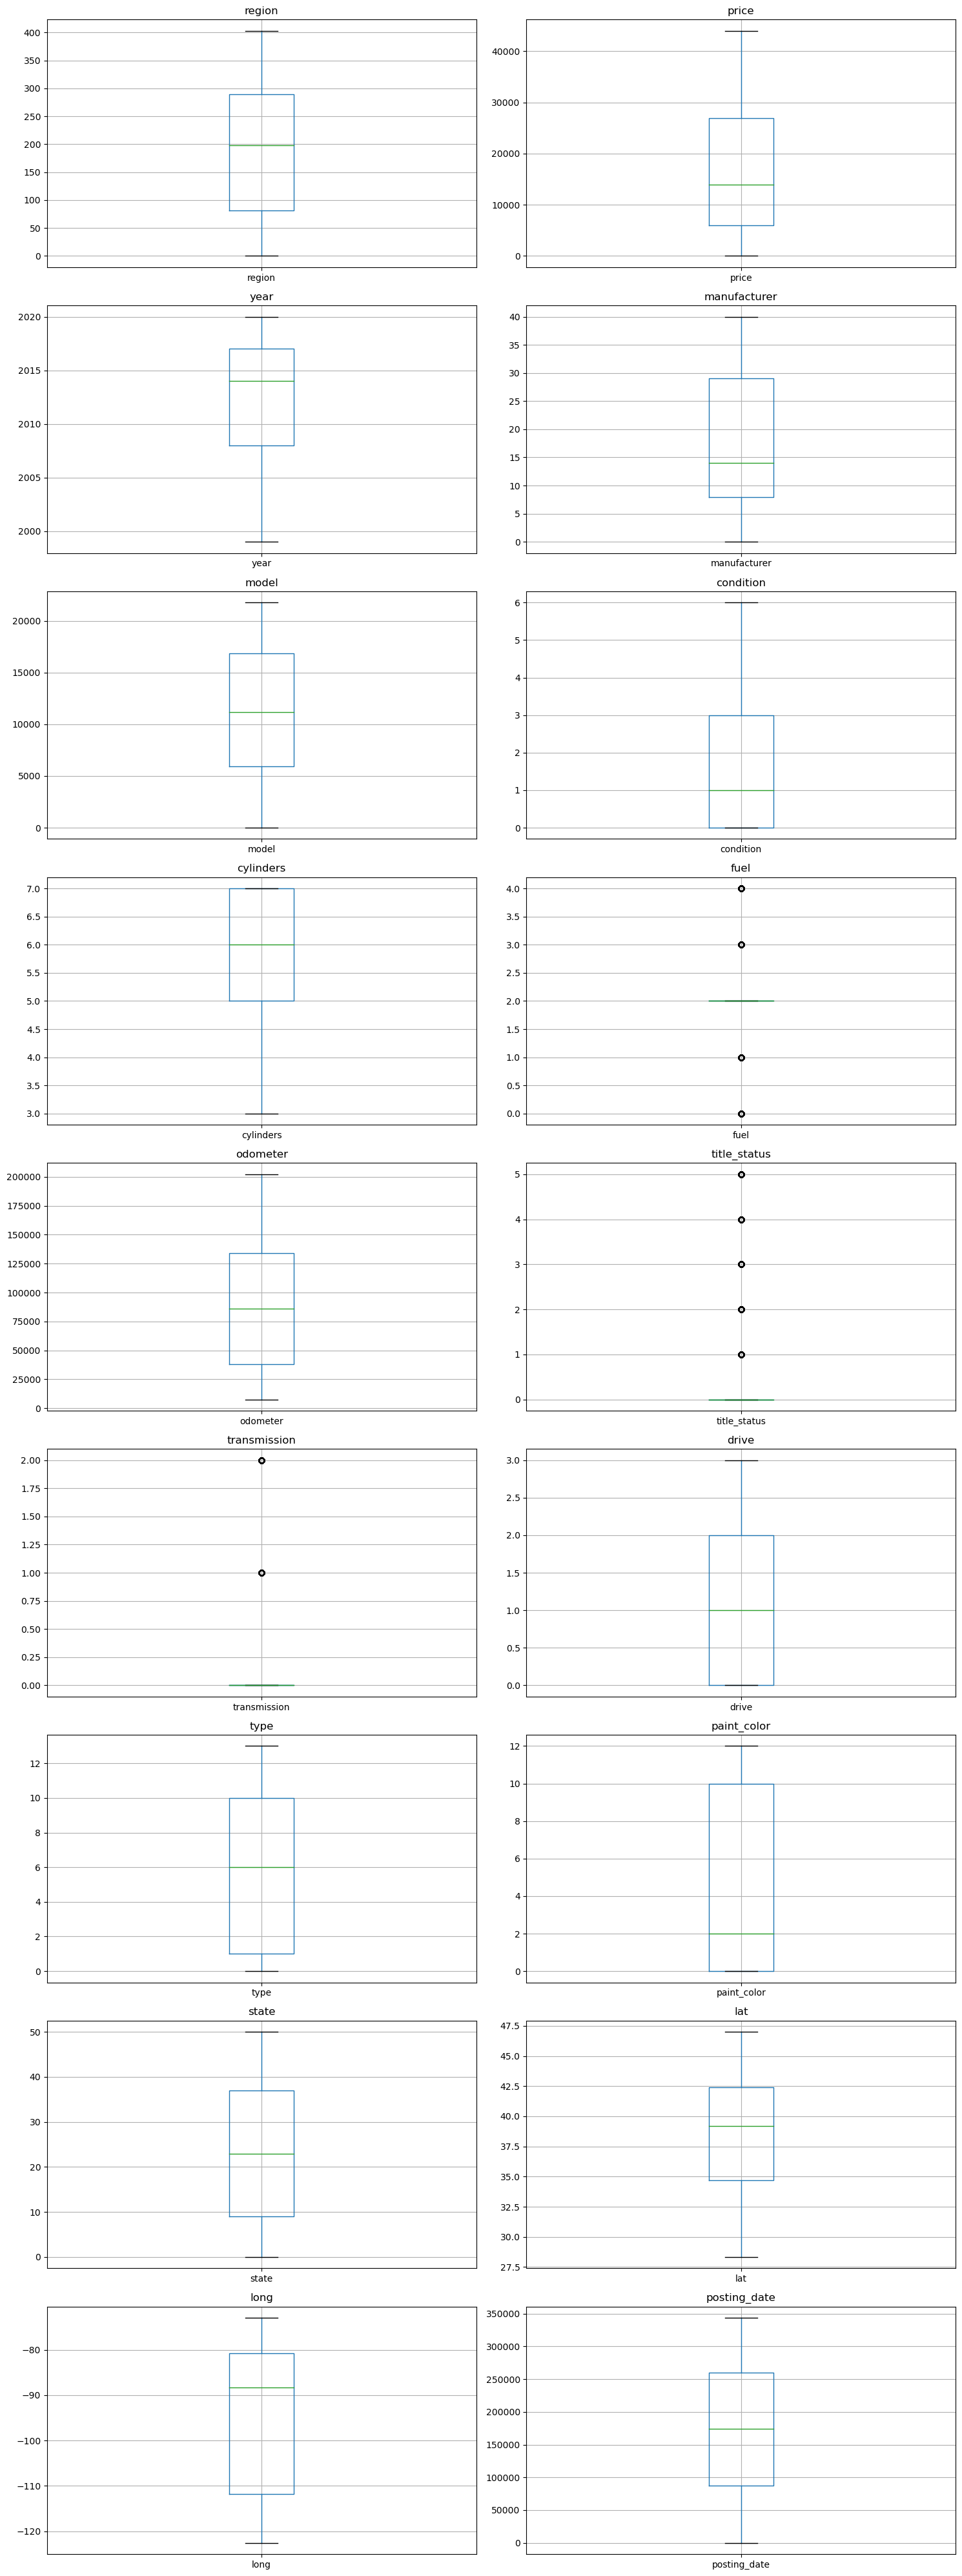

In [33]:
num_columns = 2
num_rows = (len(vehicles_df.columns) - 1) // num_columns + 1

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 40))

for i, column in enumerate(vehicles_df.columns):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row][col]
    vehicles_df.boxplot(column=column, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [34]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383489 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        383489 non-null  int64  
 1   price         383489 non-null  int64  
 2   year          383489 non-null  float64
 3   manufacturer  383489 non-null  int64  
 4   model         383489 non-null  int64  
 5   condition     383489 non-null  int64  
 6   cylinders     383489 non-null  int64  
 7   fuel          383489 non-null  int64  
 8   odometer      383489 non-null  float64
 9   title_status  383489 non-null  int64  
 10  transmission  383489 non-null  int64  
 11  drive         383489 non-null  int64  
 12  type          383489 non-null  int64  
 13  paint_color   383489 non-null  int64  
 14  state         383489 non-null  int64  
 15  lat           383489 non-null  float64
 16  long          383489 non-null  float64
 17  posting_date  383489 non-null  int64  
dtypes: 

In [35]:
vehicles_df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date
27,16,33590,2014.0,14,17105,3,6,2,57923.0,0,2,1,9,11,1,32.590000,-85.480000,332965
28,16,22590,2010.0,7,17487,3,6,2,71229.0,0,2,1,9,2,1,32.590000,-85.480000,332947
29,16,39590,2020.0,7,17510,3,6,2,19160.0,0,2,1,9,9,1,32.590000,-85.480000,332977
30,16,30990,2017.0,38,20200,3,6,2,41124.0,0,2,1,9,9,1,32.590000,-85.480000,328516
31,16,15000,2013.0,13,8699,1,5,2,128000.0,0,0,3,11,1,1,32.592000,-85.518900,307710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,397,23590,2019.0,30,13233,3,5,2,32226.0,0,2,2,10,0,50,33.786500,-84.445400,36
426876,397,30590,2020.0,40,16528,3,7,2,12029.0,0,2,2,10,9,50,33.786500,-84.445400,35
426877,397,34990,2020.0,6,21505,3,7,0,7609.0,0,2,1,5,11,50,33.779214,-84.411811,34
426878,397,28990,2018.0,23,7807,3,5,2,30112.0,0,2,2,10,10,50,33.786500,-84.445400,33


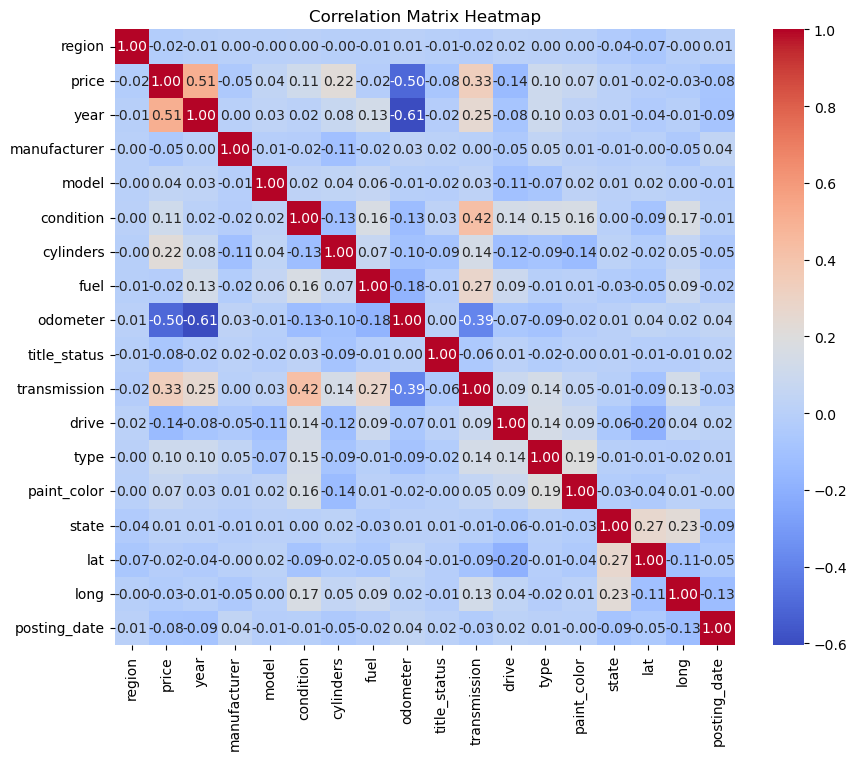

In [36]:
import seaborn as sns

corr_matrix = vehicles_df.corr() # calculate correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f') # generate heat map
plt.title('Correlation Matrix Heatmap')
plt.show()

In [37]:
# Get the correlation matrix
corr_matrix = vehicles_df.corr()

# Create a list to store correlation pairs
correlation_pairs = []

# Iterate through the correlation matrix
for i, column1 in enumerate(corr_matrix.columns):
    for j, column2 in enumerate(corr_matrix.columns):
        if i != j:  
            correlation = abs(corr_matrix[column1][column2])
            correlation_pairs.append((column1, column2, correlation))

# Sort correlation pairs by the absolute correlation in descending order
correlation_pairs.sort(key=lambda x: x[2], reverse=True)

# Print the sorted correlation pairs
for pair in correlation_pairs:
    column1, column2, correlation = pair
    print(f"Absolute Correlation between {column1} and {column2}: {correlation:.2f}")

Absolute Correlation between year and odometer: 0.61
Absolute Correlation between odometer and year: 0.61
Absolute Correlation between price and year: 0.51
Absolute Correlation between year and price: 0.51
Absolute Correlation between price and odometer: 0.50
Absolute Correlation between odometer and price: 0.50
Absolute Correlation between condition and transmission: 0.42
Absolute Correlation between transmission and condition: 0.42
Absolute Correlation between odometer and transmission: 0.39
Absolute Correlation between transmission and odometer: 0.39
Absolute Correlation between price and transmission: 0.33
Absolute Correlation between transmission and price: 0.33
Absolute Correlation between fuel and transmission: 0.27
Absolute Correlation between transmission and fuel: 0.27
Absolute Correlation between state and lat: 0.27
Absolute Correlation between lat and state: 0.27
Absolute Correlation between year and transmission: 0.25
Absolute Correlation between transmission and year: 0.2

In [38]:
vehicles_df.nunique()

region             404
price            12456
year                22
manufacturer        41
model            21785
condition            7
cylinders            5
fuel                 5
odometer         89876
title_status         6
transmission         3
drive                4
type                14
paint_color         13
state               51
lat              45250
long             45389
posting_date    343712
dtype: int64

In [39]:
categorical = vehicles_df[['region', 'year', 'manufacturer', 'condition', 'cylinders',
                          'fuel', 'title_status', 'transmission', 'drive', 'type',
                          'paint_color', 'state']]
categorical.nunique()

region          404
year             22
manufacturer     41
condition         7
cylinders         5
fuel              5
title_status      6
transmission      3
drive             4
type             14
paint_color      13
state            51
dtype: int64

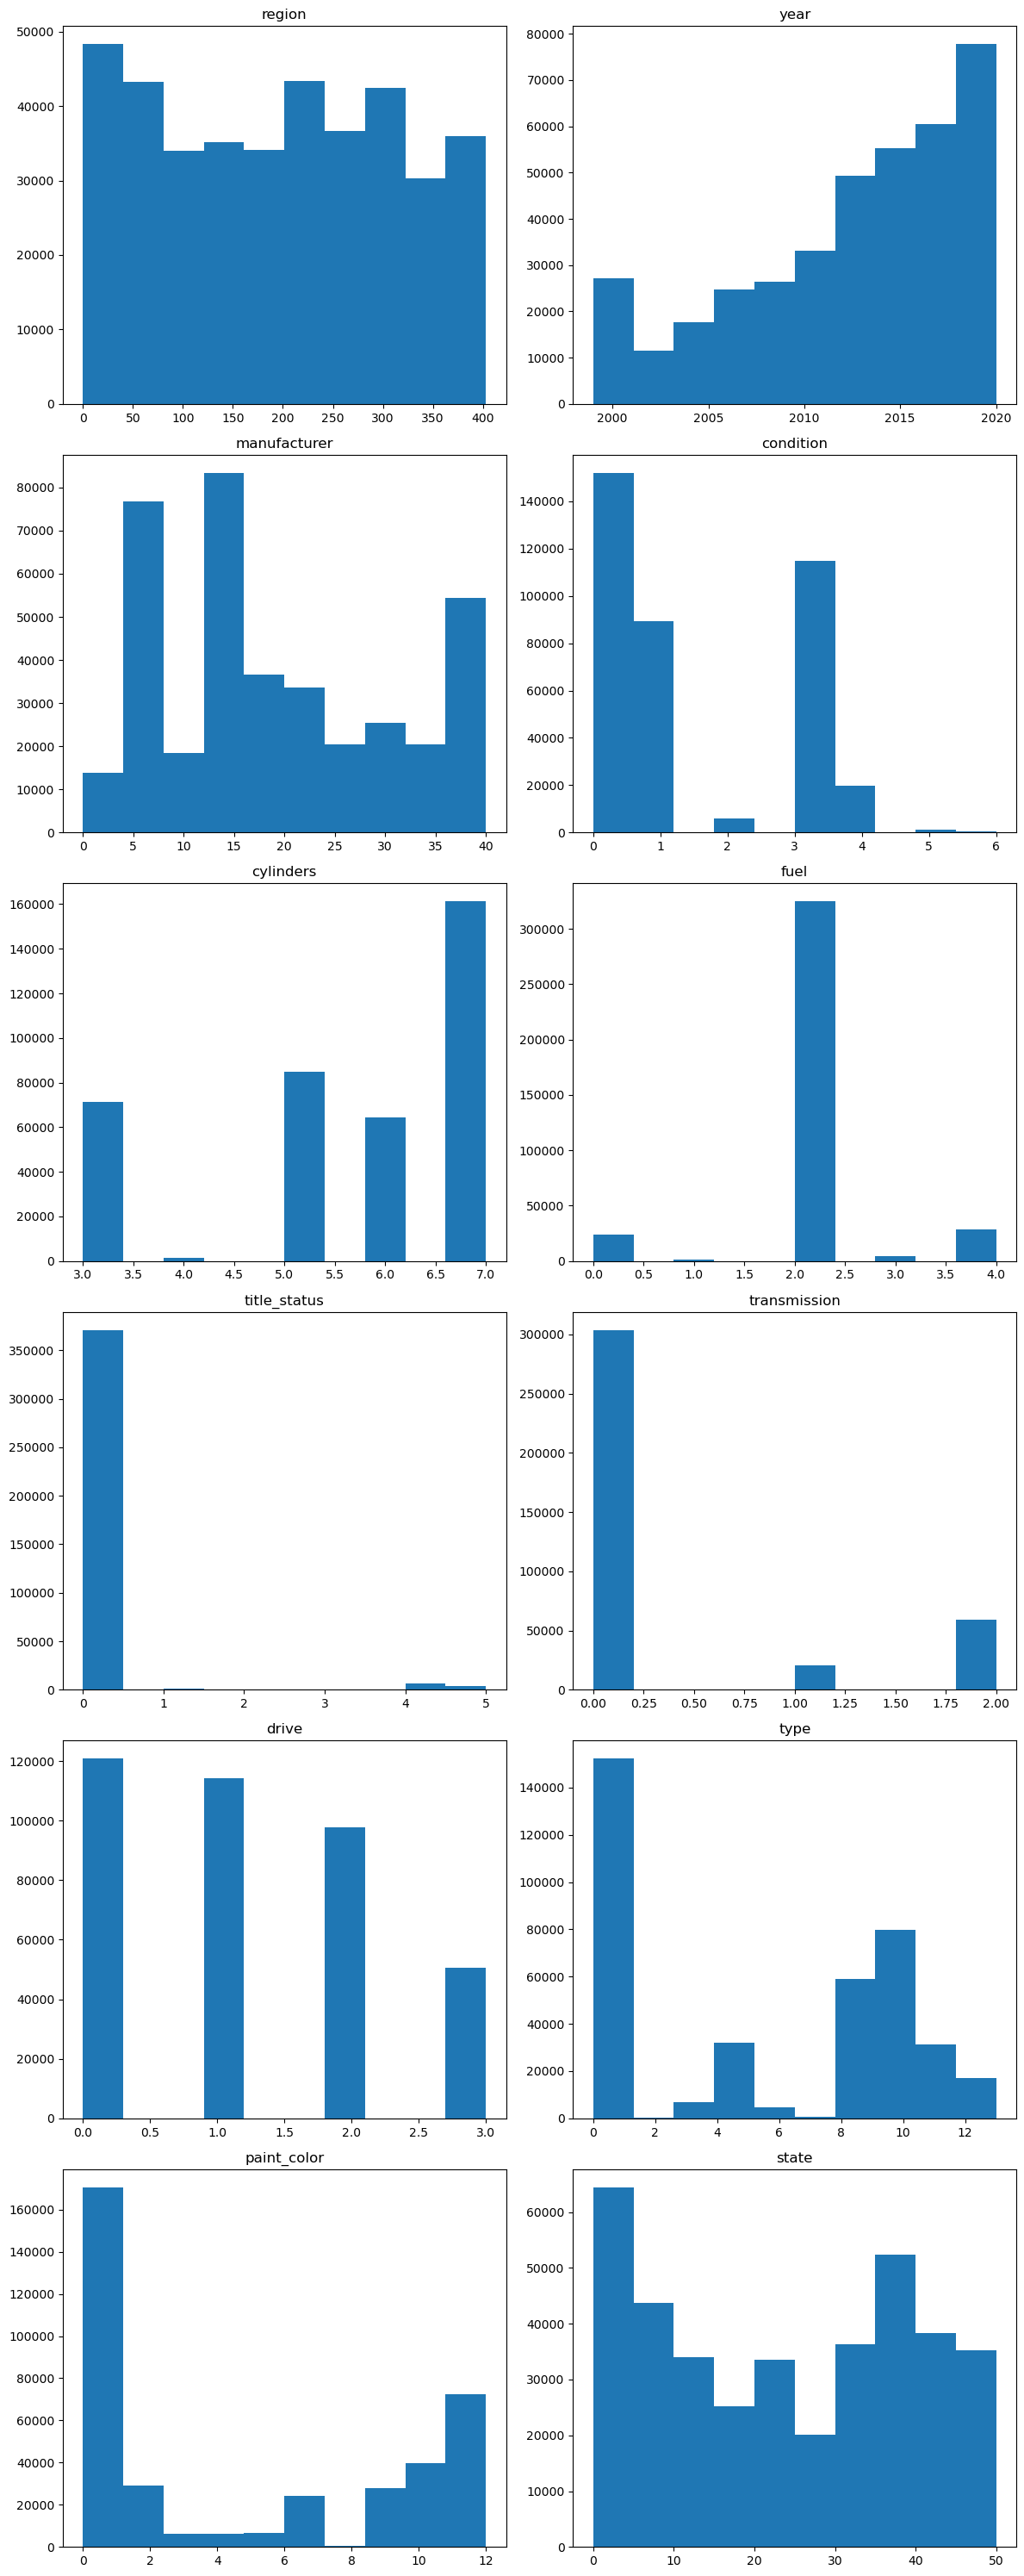

In [40]:
# Create the subplot grid
num_cols = len(categorical.columns)
rows = num_cols // 2 + num_cols % 2
fig, axes = plt.subplots(rows, 2, figsize=(12, 30))

# Iterate over each transformed column and plot histogram
for i, column in enumerate(categorical.columns):
    row = i // 2
    col = i % 2

    # Filter out infinite and NaN values before plotting
    data = categorical[column].replace([np.inf, -np.inf], np.nan).dropna()

    axes[row, col].hist(data)
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()

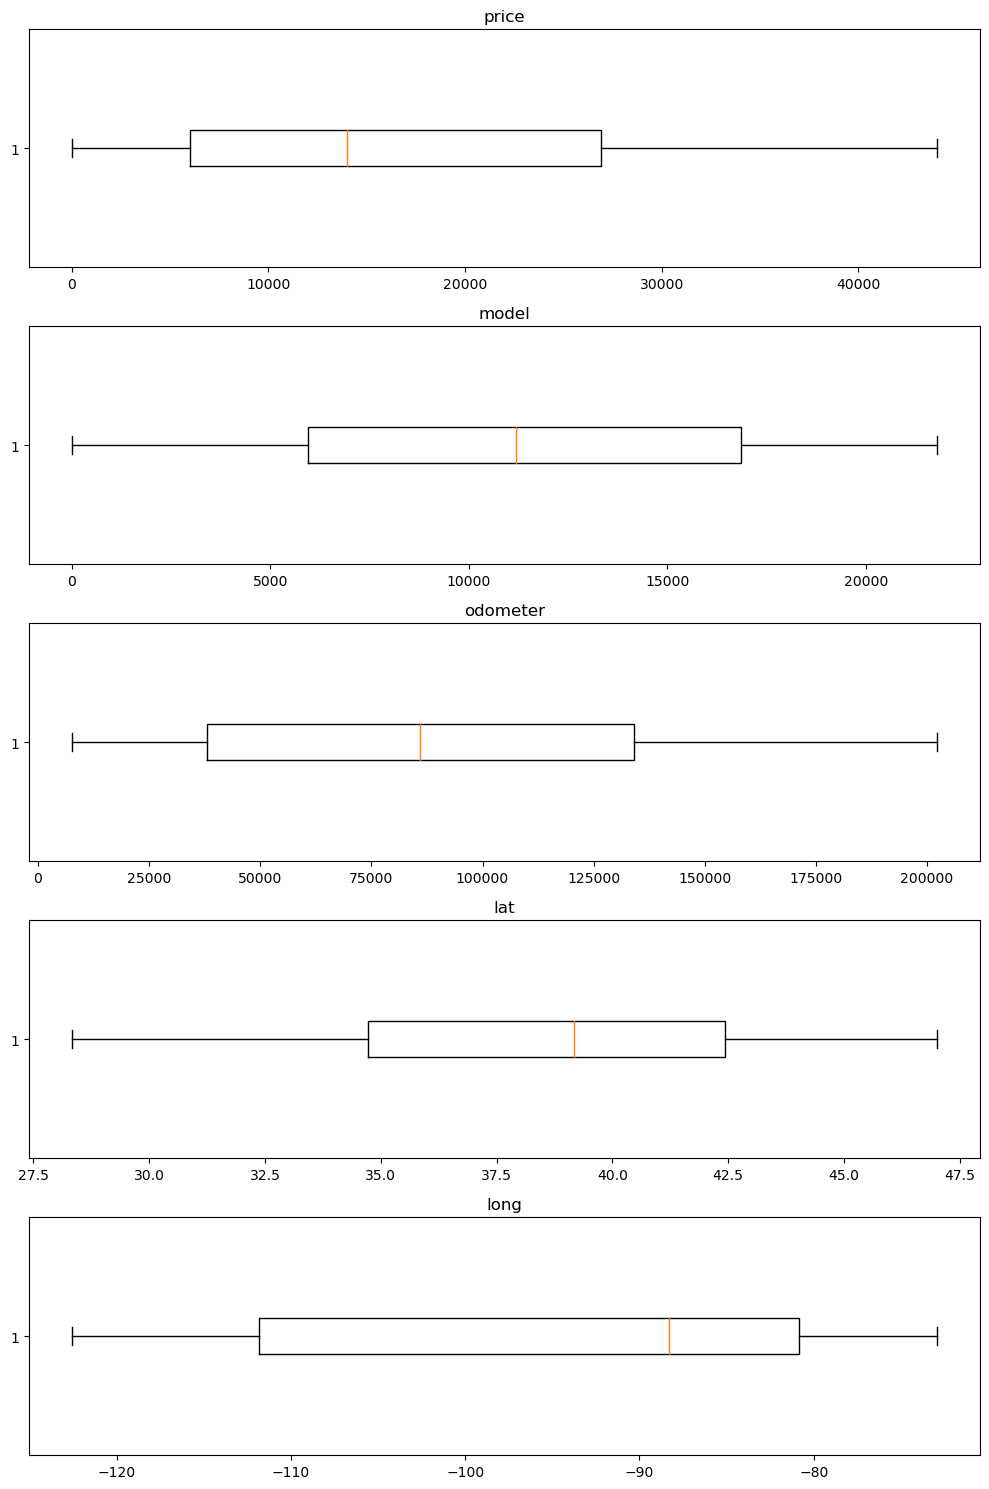

In [41]:
continuous = vehicles_df[['price', 'model', 'odometer', 'lat', 'long']]

num_cols = len(continuous.columns)
fig, axes = plt.subplots(num_cols, 1, figsize=(10, 15))

for i, column in enumerate(continuous.columns):
    # Filter out infinite and NaN values before plotting
    data = continuous[column].replace([np.inf, -np.inf], np.nan).dropna()

    axes[i].boxplot(data, vert=False)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()



C:\Users\Jody\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


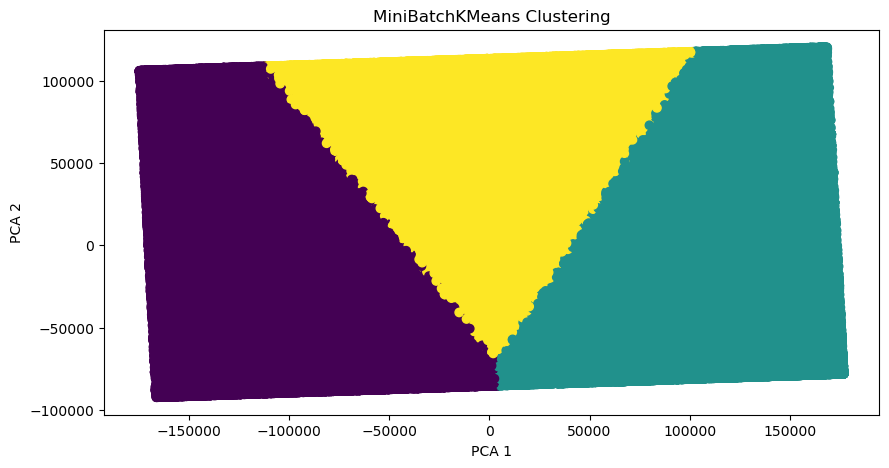

In [43]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA

# Define the features you want to include in the clustering
X_std = vehicles_df.values

# Create MiniBatchKMeans object
minibatch_kmeans = MiniBatchKMeans(n_clusters=3, batch_size=200)

# Fit and predict 
mbkmeans_clusters = minibatch_kmeans.fit_predict(X_std)

# Perform PCA for visualization purposes
pca = PCA(n_components=2).fit_transform(X_std)

# Plotting the results of MiniBatchKMeans
plt.figure(figsize=(10,5))
plt.scatter(pca[:, 0], pca[:, 1], c=mbkmeans_clusters)
plt.title('MiniBatchKMeans Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

             region         price         year  manufacturer         model  \
cluster                                                                      
0        194.200159  17462.632399  2012.660846     19.015515  11049.296994   
1        191.794511  19684.311931  2013.641127     17.892065  11280.073421   
2        196.587523  11931.242181  2009.630903     18.761468  11148.555519   

         condition  cylinders      fuel       odometer  title_status  \
cluster                                                                
0         1.420939   5.590142  2.050089   77807.320500      0.137898   
1         1.461472   5.752059  2.083579   73440.411623      0.112688   
2         1.236980   5.514857  1.916430  135373.699438      0.126457   

         transmission     drive      type  paint_color      state        lat  \
cluster                                                                        
0            0.406198  1.247027  5.743214     4.680192  21.848567  38.074534   
1       

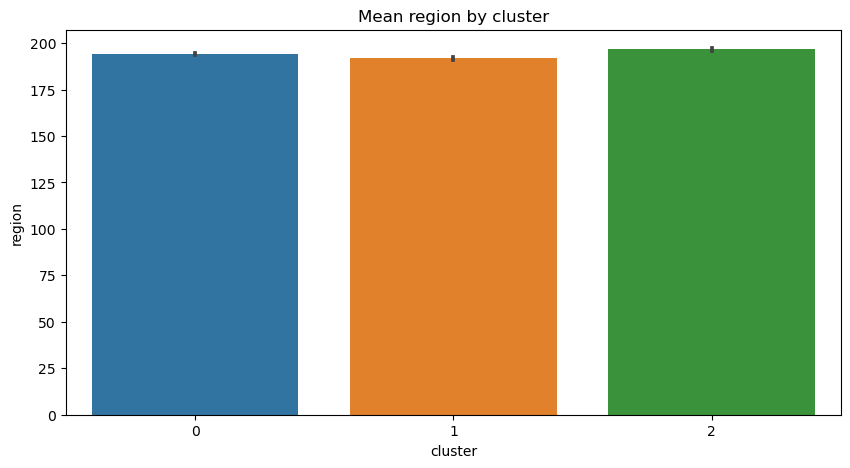

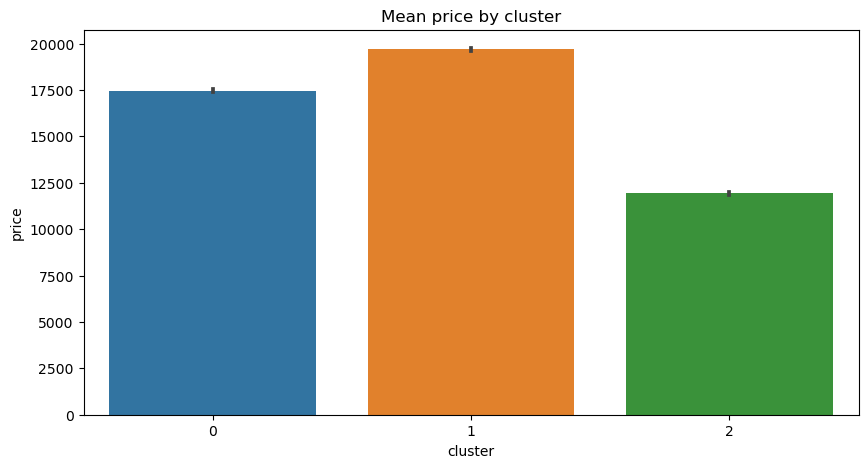

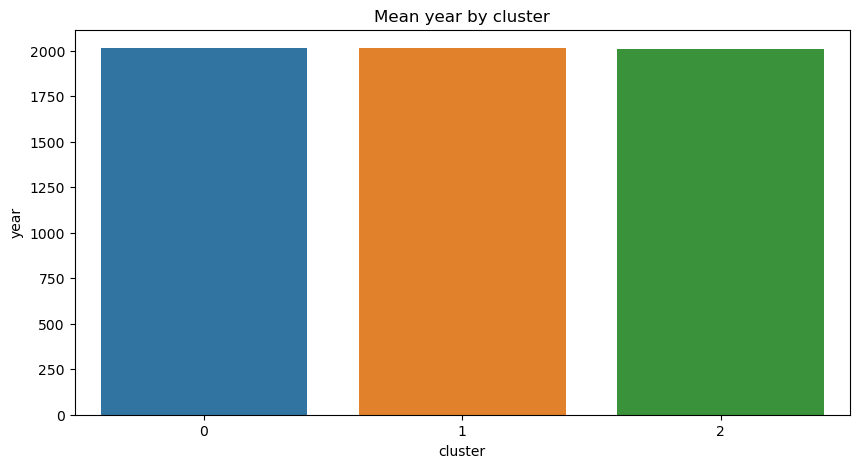

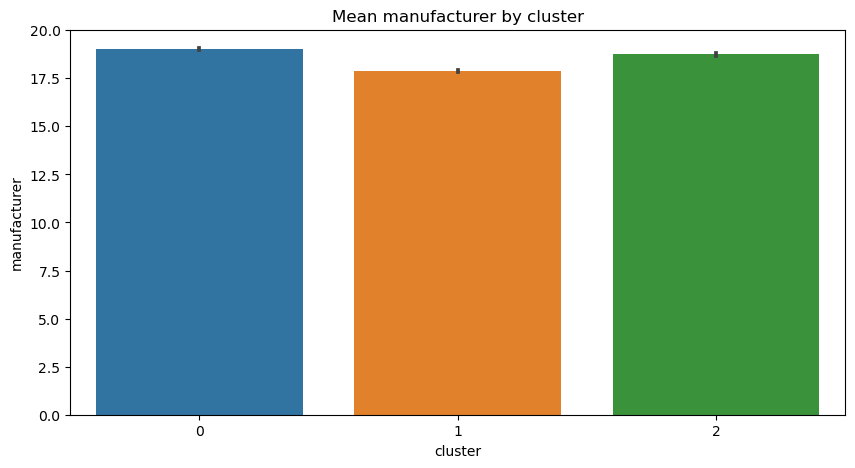

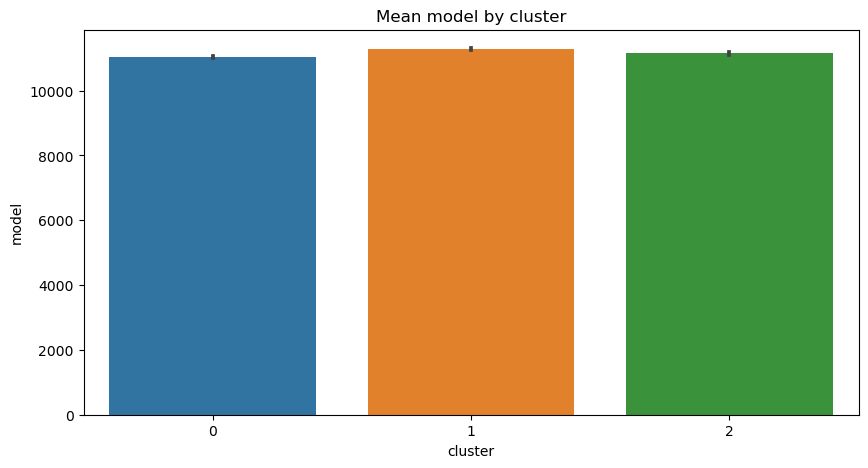

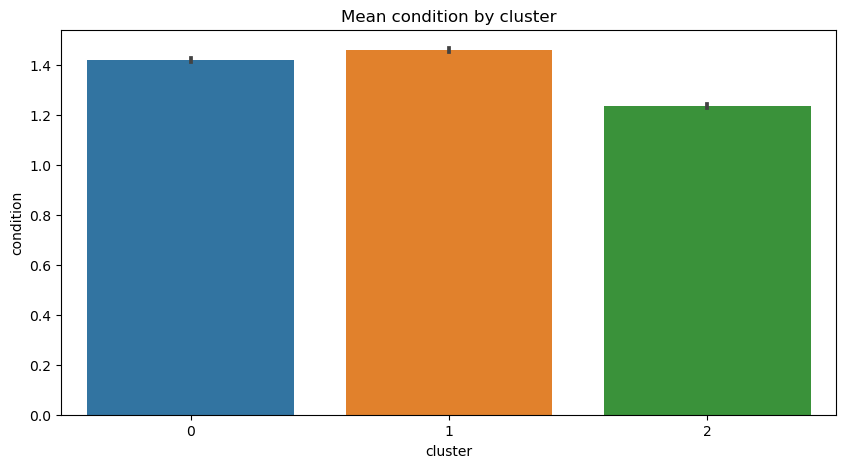

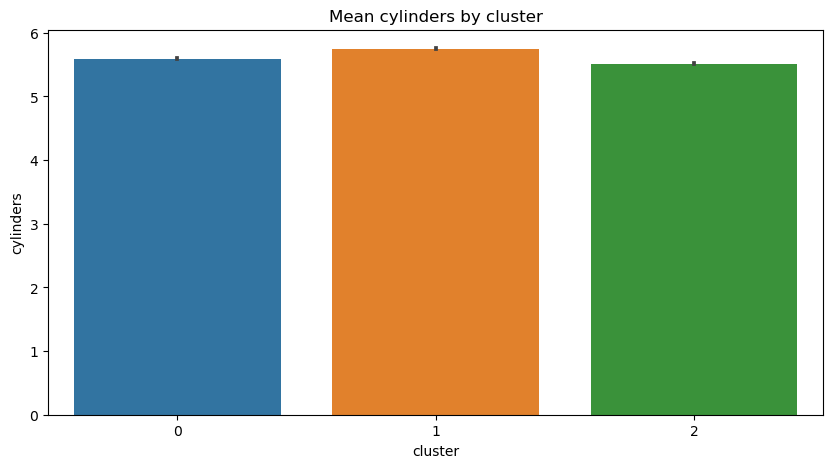

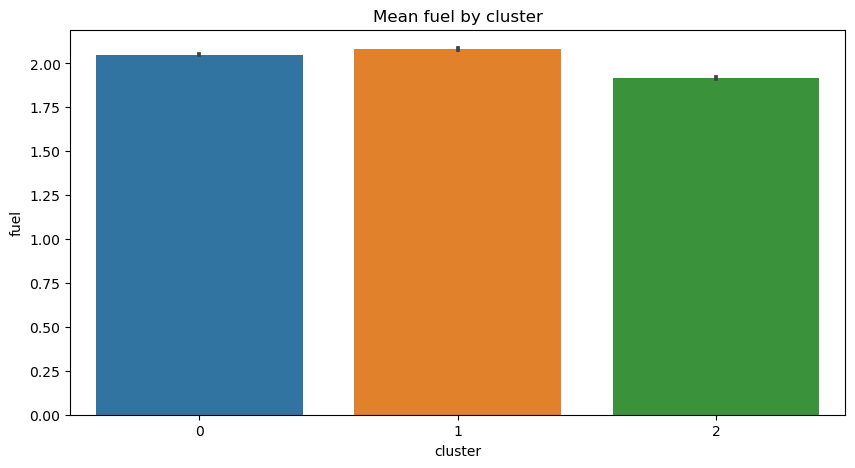

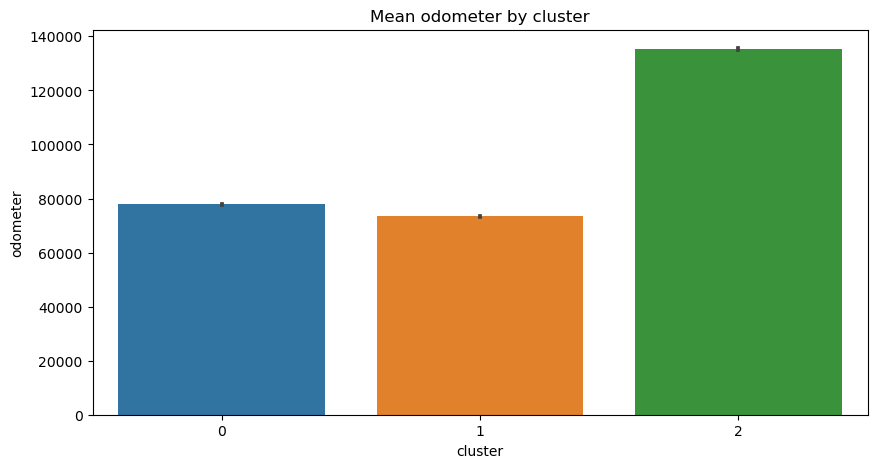

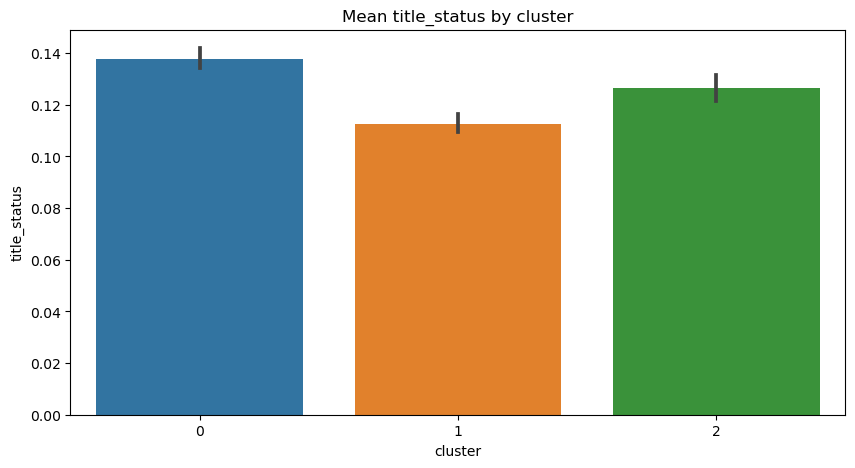

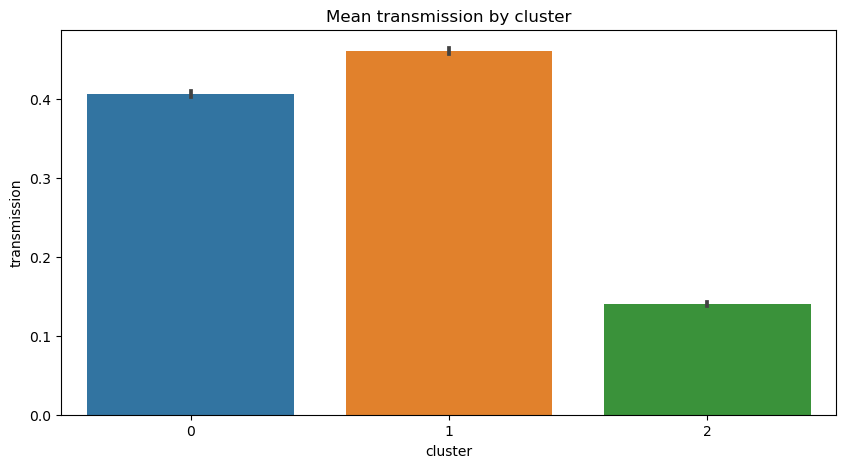

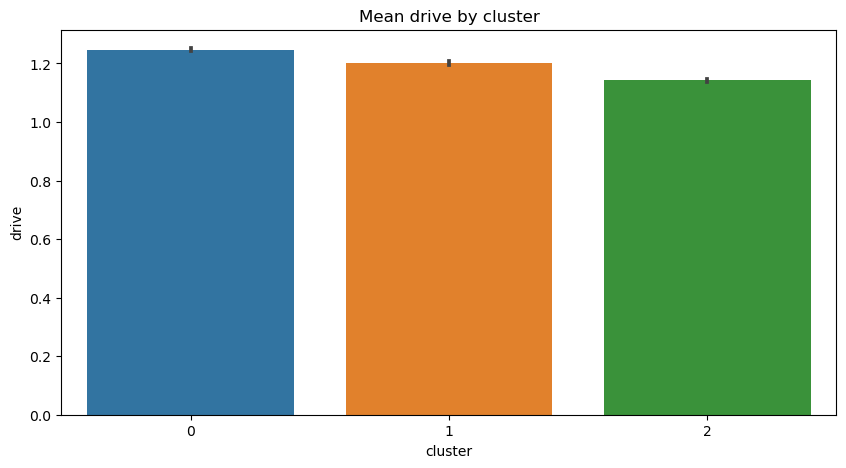

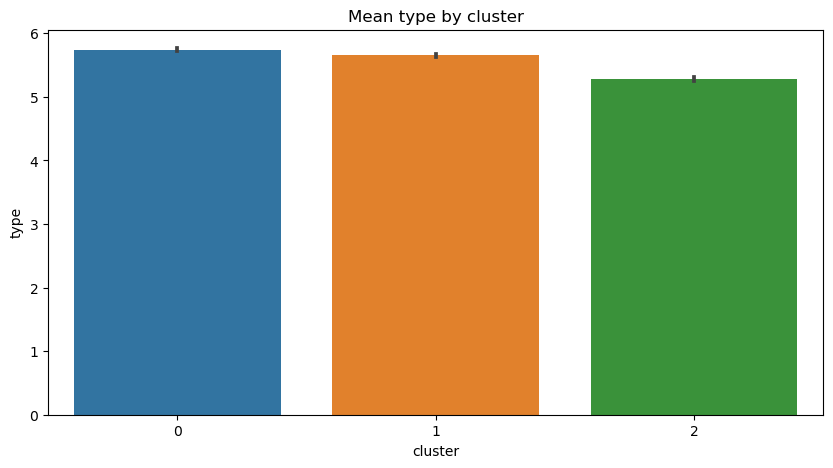

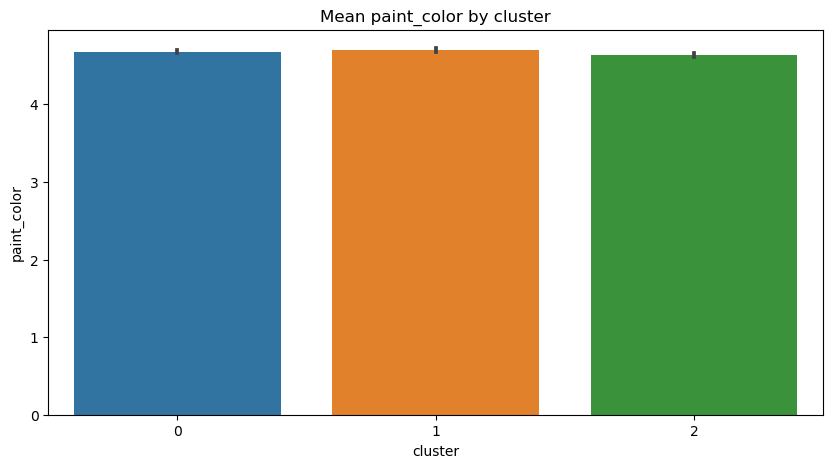

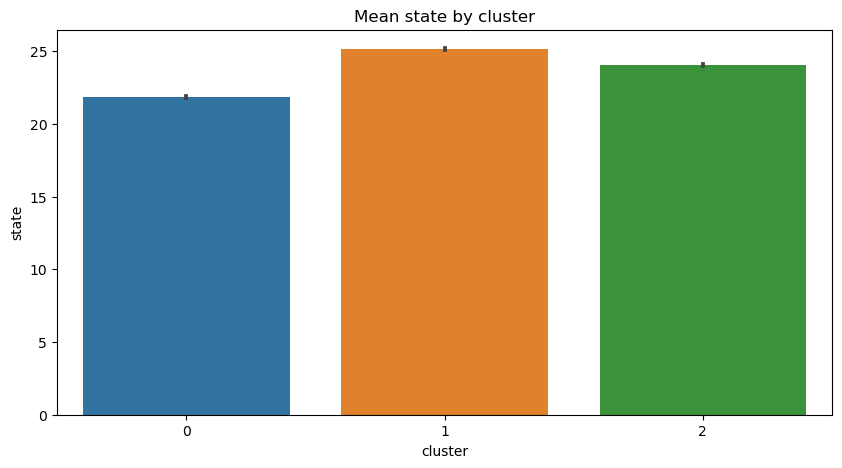

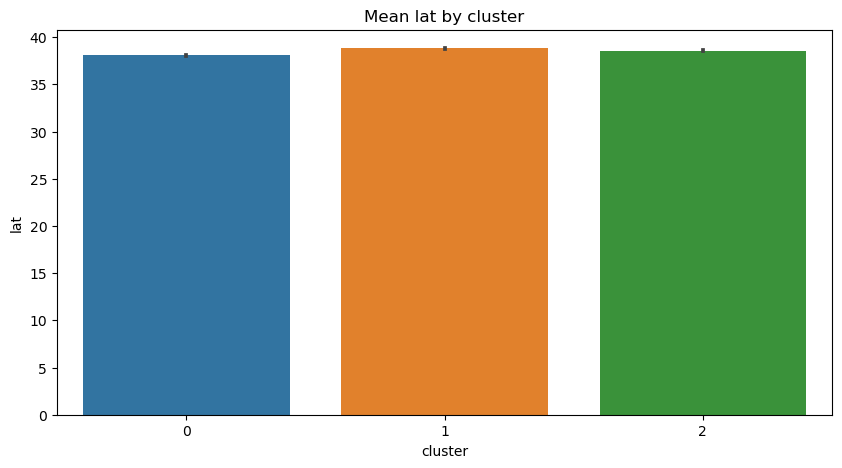

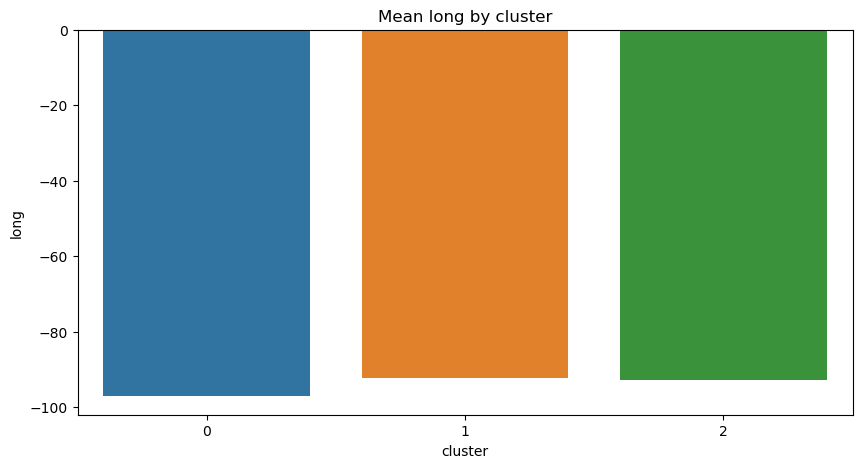

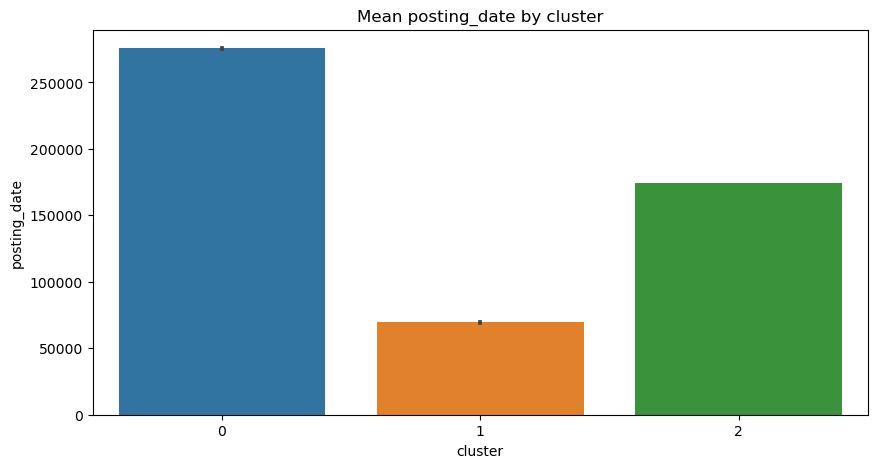

In [44]:
# Assign the cluster labels to each data point in your original DataFrame
vehicles_df['cluster'] = mbkmeans_clusters

# Calculate the mean values of the original features for each cluster
cluster_analysis = vehicles_df.groupby('cluster').mean()

# Print out the cluster analysis
print(cluster_analysis)

# Import seaborn for plotting
import seaborn as sns

# For each column in your dataframe, create a bar plot of the mean values per cluster
for column in vehicles_df.drop('cluster', axis=1).columns:
    plt.figure(figsize=(10,5))
    sns.barplot(x=vehicles_df['cluster'], y=vehicles_df[column])
    plt.title(f'Mean {column} by cluster')
    plt.show()
